In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('Trainfile.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Shape

In [4]:
train.shape

(8523, 12)

# Clean the data

## Null values

In [5]:
train.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

## Total NA values

In [6]:
print(train['Item_Weight'].isnull().sum())
print(train['Outlet_Size'].isnull().sum())

1463
2410


## Replacing values

In [7]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
train['Item_Fat_Content']=train['Item_Fat_Content'].str.replace('LF','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].str.replace('low fat','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].str.replace('reg','Regular')

In [9]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [11]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [12]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Changing the data type

In [15]:
for col in ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    train[col]=train[col].astype('category')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(5), float64(4), int64(1), object(2)
memory usage: 509.1+ KB


## Filling missing values

In [17]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [18]:
train.isnull().values.any()

False

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

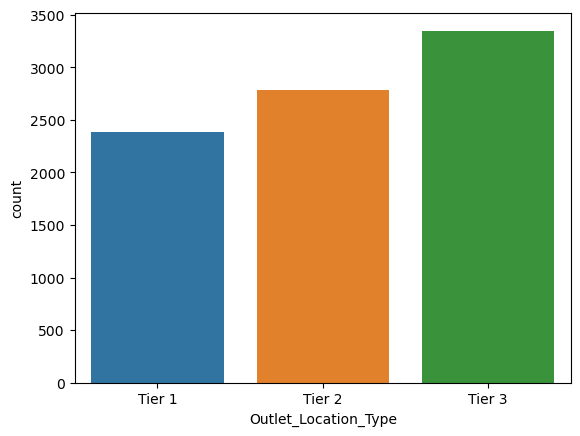

In [23]:
sns.countplot(data=train,x=train['Outlet_Location_Type'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Baking Goods'),
  Text(1, 0, 'Breads'),
  Text(2, 0, 'Breakfast'),
  Text(3, 0, 'Canned'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Frozen Foods'),
  Text(6, 0, 'Fruits and Vegetables'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Health and Hygiene'),
  Text(9, 0, 'Household'),
  Text(10, 0, 'Meat'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Seafood'),
  Text(13, 0, 'Snack Foods'),
  Text(14, 0, 'Soft Drinks'),
  Text(15, 0, 'Starchy Foods')])

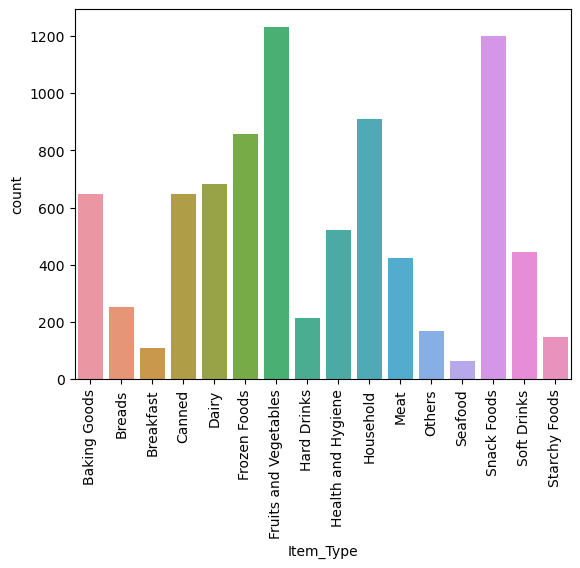

In [25]:
sns.countplot(data=train,x=train['Item_Type'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Grocery Store'),
  Text(1, 0, 'Supermarket Type1'),
  Text(2, 0, 'Supermarket Type2'),
  Text(3, 0, 'Supermarket Type3')])

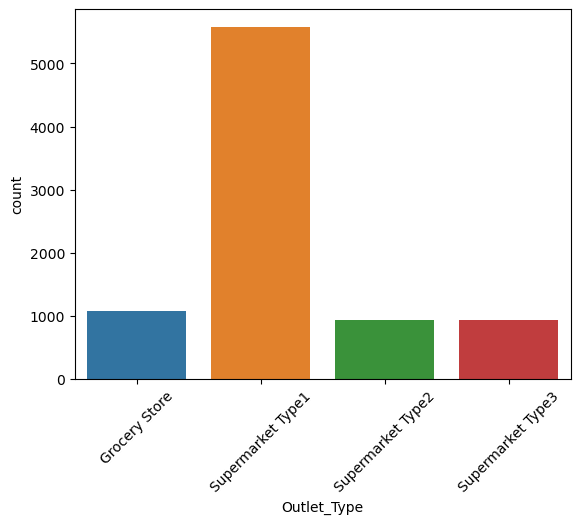

In [27]:
sns.countplot(data=train,x=train['Outlet_Type'])
plt.xticks(rotation=45)

C:\Users\User\AppData\Local\Temp\ipykernel_15528\161984636.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

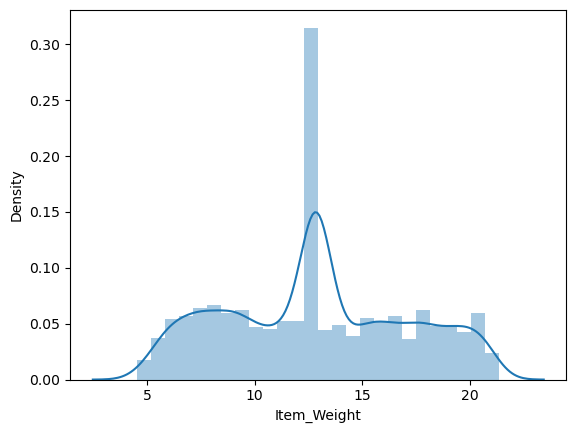

In [28]:
sns.distplot(train['Item_Weight'])

C:\Users\User\AppData\Local\Temp\ipykernel_15528\62235576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

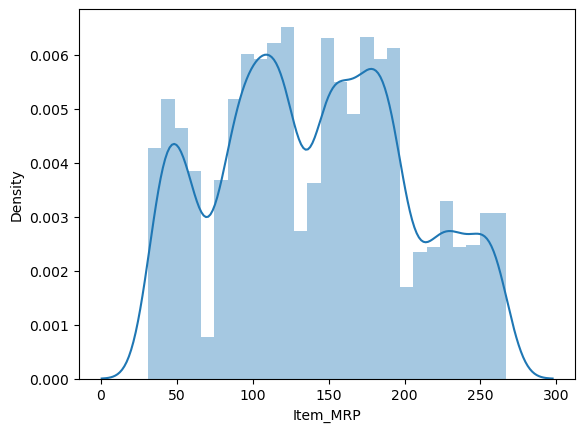

In [29]:
sns.distplot(train['Item_MRP'])

C:\Users\User\AppData\Local\Temp\ipykernel_15528\2094790428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

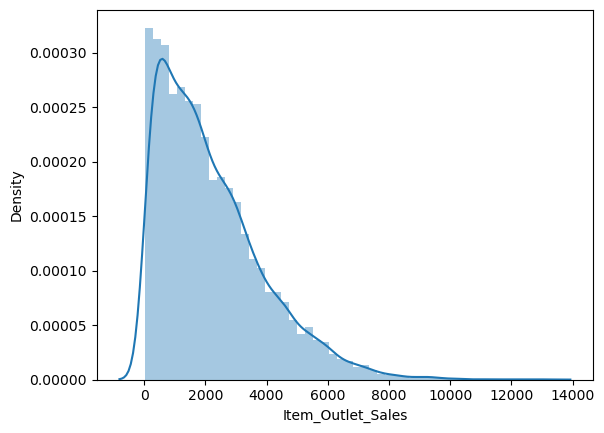

In [30]:
sns.distplot(train['Item_Outlet_Sales'])

## Convert the data to numerical format

In [19]:
from sklearn import preprocessing

In [20]:
#fit transform=Fit label encoder and return encoded labels.
label_encoder = preprocessing.LabelEncoder()
train['Outlet_Size']= label_encoder.fit_transform(train['Outlet_Size'])

In [21]:
train['Item_Fat_Content']= label_encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type']= label_encoder.fit_transform(train['Item_Type'])
train['Outlet_Location_Type']= label_encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']= label_encoder.fit_transform(train['Outlet_Type'])
train['Outlet_Establishment_Year']=label_encoder.fit_transform(train['Outlet_Establishment_Year'])

In [22]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,4,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,8,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,4,1,0,1,2097.2700
3,FDX07,19.200,1,0.000000,6,182.0950,OUT010,3,1,2,0,732.3800
4,NCD19,8.930,0,0.000000,9,53.8614,OUT013,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1,0,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,OUT045,5,1,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,6,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,OUT018,8,1,2,2,1845.5976


In [23]:
train['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

# Cleaning the test dataset

In [31]:
test=pd.read_csv("Testfile.csv")

In [32]:
test.shape

(5681, 11)

In [33]:
test.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [34]:
print(test['Item_Weight'].isnull().sum())
print(test['Outlet_Size'].isnull().sum())

976
1606


In [35]:
test['Item_Fat_Content']=test['Item_Fat_Content'].str.replace('LF','Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].str.replace('low fat','Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].str.replace('reg','Regular')

In [36]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [37]:
for col in ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    test[col]=test[col].astype('category')

In [38]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [ ]:
sns.countplot(data=train,x=train['Outlet_Location_Type'])

In [32]:
test['Item_Fat_Content']= label_encoder.fit_transform(test['Item_Fat_Content'])
test['Item_Type']= label_encoder.fit_transform(test['Item_Type'])
test['Outlet_Location_Type']= label_encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']= label_encoder.fit_transform(test['Outlet_Type'])
test['Outlet_Size']= label_encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Establishment_Year']=label_encoder.fit_transform(test['Outlet_Establishment_Year'])

In [33]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,4,1,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,OUT017,7,1,1,1
2,NCN55,14.600000,0,0.099575,11,241.7538,OUT010,3,1,2,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,7,1,1,1
4,FDY38,12.695633,1,0.118599,4,234.2300,OUT027,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,13,141.3154,OUT046,2,2,0,1
5677,FDD47,7.600000,1,0.142991,15,169.1448,OUT018,8,1,2,2
5678,NCO17,10.000000,0,0.073529,8,118.7440,OUT045,5,1,1,1
5679,FDJ26,15.300000,1,0.000000,3,214.6218,OUT017,7,1,1,1


In [46]:
X_test=test.loc[:, test.columns != 'Item_Identifier']

In [48]:
X_test=X_test.loc[:,X_test.columns != 'Outlet_Identifier']

In [50]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,4,1,0,1
1,8.300000,1,0.038428,4,87.3198,7,1,1,1
2,14.600000,0,0.099575,11,241.7538,3,1,2,0
3,7.315000,0,0.015388,13,155.0340,7,1,1,1
4,12.695633,1,0.118599,4,234.2300,0,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,2,2,0,1
5677,7.600000,1,0.142991,15,169.1448,8,1,2,2
5678,10.000000,0,0.073529,8,118.7440,5,1,1,1
5679,15.300000,1,0.000000,3,214.6218,7,1,1,1


### Extract the independant and dependant varialbes from our train dataset

In [37]:
X_train=train.loc[:,train.columns!='Item_Identifier']
X_train=X_train.loc[:,X_train.columns!='Outlet_Identifier']
X_train=X_train.loc[:,X_train.columns!='Item_Outlet_Sales']

In [38]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,4,1,0,1
1,5.920,1,0.019278,14,48.2692,8,1,2,2
2,17.500,0,0.016760,10,141.6180,4,1,0,1
3,19.200,1,0.000000,6,182.0950,3,1,2,0
4,8.930,0,0.000000,9,53.8614,1,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1
8519,8.380,1,0.046982,0,108.1570,5,1,1,1
8520,10.600,0,0.035186,8,85.1224,6,2,1,1
8521,7.210,1,0.145221,13,103.1332,8,1,2,2


In [39]:
Y_train=train['Item_Outlet_Sales']
Y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Multiple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [44]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [45]:
print(regressor.coef_)
print(regressor.intercept_)

[-9.81284711e-01  5.59345103e+01 -1.49632933e+03 -7.78679763e-01
  1.55975699e+01  2.28475192e+00 -3.31503770e+02 -4.22565656e+02
  9.97273478e+02]
-268.5935578244921


In [51]:
y_pred=regressor.predict(X_test)

In [52]:
y_pred

array([2046.89937947, 1339.75510872, 2160.50831725, ..., 1712.08686489,
       3376.76709662, 1118.23837382])

In [67]:
test_1=test[['Item_Identifier','Outlet_Identifier']]

In [68]:
test_1['Item_Outlet_Sales']=y_pred

C:\Users\User\AppData\Local\Temp\ipykernel_16500\924104290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['Item_Outlet_Sales']=y_pred


In [69]:
test_1

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2046.899379
1,FDW14,OUT017,1339.755109
2,NCN55,OUT010,2160.508317
3,FDQ58,OUT017,2368.430369
4,FDY38,OUT027,5062.908717
...,...,...,...
5676,FDB58,OUT046,2289.731737
5677,FDD47,OUT018,3028.679249
5678,NCO17,OUT045,1712.086865
5679,FDJ26,OUT017,3376.767097


In [58]:
test_1.to_csv('submission.csv',index=False)

In [60]:
test_1[test_1['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
30,NCR42,OUT019,-551.359125
46,FDR14,OUT010,-1018.026108
112,FDO38,OUT010,-443.754752
133,FDY59,OUT010,-59.735035
172,NCP14,OUT010,-68.110203
...,...,...,...
5475,FDC59,OUT019,-49.098717
5514,DRJ25,OUT010,-1055.069183
5540,DRF51,OUT035,-5.441201
5580,FDA23,OUT010,-4.831499


## Decision Tree 

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
Model = DecisionTreeRegressor(max_depth=None,random_state=40)
Model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=40)

In [63]:
y_Pred = Model.predict(X_test)

In [64]:
y_Pred

array([2908.2144,  959.4178,  697.0926, ...,  942.7728, 7247.233 ,
       1198.44  ])

In [66]:
test_2=test[['Item_Identifier','Outlet_Identifier']]

In [70]:
test_2['Item_Outlet_Sales']=y_Pred

C:\Users\User\AppData\Local\Temp\ipykernel_16500\2445518319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2['Item_Outlet_Sales']=y_Pred


In [73]:
test_2.to_csv('submission1.csv',index=False)

In [74]:
test_2[test_2['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
